Classification: Decision Tree Dataset:
madfhantr.csv
Dream Housing Finance company deals in all kinds of home loans. They have
presence across all urban, semi urban and rural areas.
Customer first applies for home loan and after that company validates the
customer eligibility for loan.
Company wants to automate the loan eligibility process (real time) based on
customer detail provided while filling online application form. These details
are Gender, Marital Status, Education, Number of Dependents, Income, Loan
Amount, Credit History and others. To automate this process, they have
provided a dataset to identify the customers segments that are eligible for loan
amount so that they can
specifically target these customers.


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

In [4]:
from google.colab import files
uploaded = files.upload()

Saving madfhantr.csv to madfhantr.csv


In [5]:
df = pd.read_csv("madfhantr.csv")

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.fillna({
    'LoanAmount': df['LoanAmount'].mean(),
    'Loan_Amount_Term': df['Loan_Amount_Term'].mean(),
    'Credit_History': df['Credit_History'].mean()
}, inplace=True)

In [10]:
label_encoder = LabelEncoder()
for column in ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']:df[column] = label_encoder.fit_transform(df[column])

In [11]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,15
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [16]:
df['Dependents'] = df['Dependents'].fillna(0)
df['Dependents'] = df['Dependents'].replace('3+',3).astype(int)

In [36]:
X = df.drop(['Loan_Status','Loan_ID'],axis=1)
y = df['Loan_Status']

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [38]:
classifier = DecisionTreeClassifier(random_state=32)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=32)

In [39]:
y_pred = classifier.predict(X_test)

In [40]:
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)
print("Classification Report:\n",classification_report(y_test,y_pred))

Accuracy:  71.54471544715447
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.54      0.56        41
           1       0.78      0.80      0.79        82

    accuracy                           0.72       123
   macro avg       0.68      0.67      0.67       123
weighted avg       0.71      0.72      0.71       123



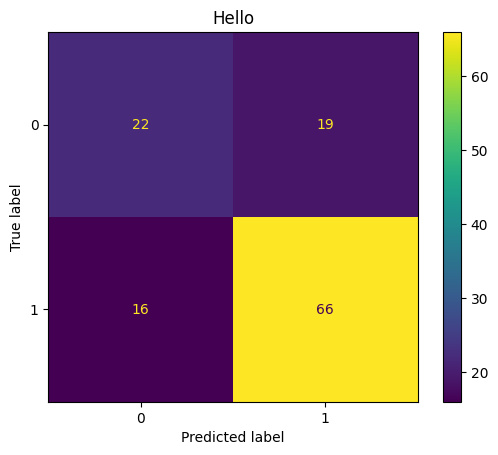

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Hello')
plt.show()